In [1]:
%matplotlib inline
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize

In [8]:
trainFile = 'E:/CODE/NLP/train1703/train1703.jsonl'
trainData = pd.read_json(testFile, lines=True)
testFile = 'E:/CODE/NLP/val1706/val1706.jsonl'
testData = pd.read_json(testFile, lines=True)

In [9]:
trainLabelsFile = 'E:/CODE/NLP/train1703/traintruth1703.jsonl'
trainLabels = pd.read_json(testLabelsFile, lines=True)
testLabelsFile = 'E:/CODE/NLP/val1706/valtruth1706.jsonl'
testLabels = pd.read_json(testLabelsFile, lines=True)

In [11]:
# Join data + labels
def label(data, labels):
    return pd.concat([data, labels['truthClass']], axis=1, join_axes=[data.index])

train = label(trainData, trainLabels)
test = label(testData, testLabels)

In [16]:
trainClick = train[train.truthClass == "clickbait"]
trainNoClick = train[train.truthClass == "no-clickbait"]
testClick = test[test.truthClass == "clickbait"]
testNoClick = test[test.truthClass == "no-clickbait"]

In [ ]:
testClick.targetTitle.iloc[0]
testClick.targetKeywords.iloc[0]

In [17]:
print(len(testClick), len(trainClick), len(testNoClick),  len(trainNoClick))

4761 762 14777 1697


In [17]:
# posFreq: returns a vector with the frequency of every POS in a given content
def posFreq(content):
#     return nltk.pos_tag_sents(str(content).strip('[]'))
#     return nltk.pos_tag(content)
    
    posTags = pd.DataFrame(nltk.pos_tag(nltk.word_tokenize(str(content)[2:-2])))
    posFrequencies = posTags[1].value_counts()
    totalWords = posFrequencies.sum()
    posFreqNormlized = posFrequencies/totalWords
    return posFreqNormlized
    
testClickPostTextPOS = testClick['postText'].apply(posFreq)
testNoClickPostTextPOS = testNoClick['postText'].apply(posFreq)
# posFrequencies.mean() # get the mean of the counts

In [18]:
testCFreq = testClickPostTextPOS.mean()
testNCFreq = testNoClickPostTextPOS.mean()

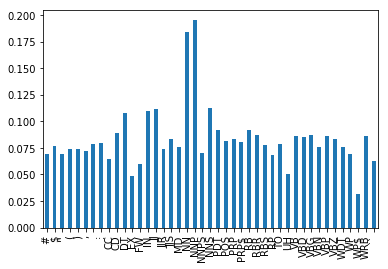

In [19]:
testCFreq.plot('bar')

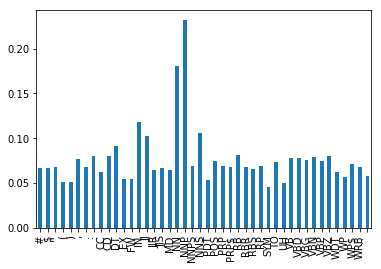

In [20]:
testNCFreq.plot('bar')

In [21]:
posFrequencies.iloc[0].sum()
# posFrequencies['#'].iloc[1] # percentage of '#' in this content
posMeans = posFrequencies.mean()
posMeans.plot('bar')
# posMeans.max/

SyntaxError: invalid syntax (<ipython-input-21-d3295501bdb9>, line 5)

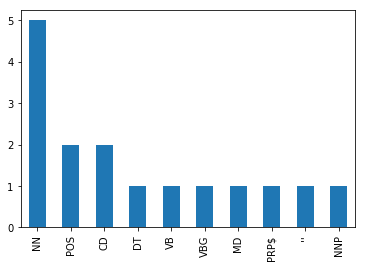

In [439]:
postag = pd.DataFrame(posFreq(valdata['postText'][0]))
postag[1].value_counts().plot('bar')

In [19]:
# To measure elapsed command time
import timeit

start = timeit.timeit()
print('hello')
end = timeit.timeit()
print(end - start)

hello
0.0003070541870413557


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import operator

In [ ]:
help(mutual_info_classif)
:ref:`User Guide <univariate_feature_selection>`

SyntaxError: invalid syntax (<ipython-input-24-55cd4dd30733>, line 2)